In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [205]:
df = pd.read_csv('navi_mumbai_hp.csv')

In [206]:
df.sample(5)

,BHK,Total Area,Price,bedroom
7075,2 BHK Apartment in Kharghar,950 sq.ft.\n(88 sq.m.) Super built-up Area,"₹ 82 L\n₹ 8,631/sq.ft.",2 BHK\n2 Baths
8066,2 BHK Apartment in Sector-35 Kamothe,857 sq.ft.\n(80 sq.m.) Built-up Area,"₹ 70 L\n₹ 8,168/sq.ft.",2 BHK\n2 Baths
7395,2 BHK Apartment in Sector 17 Ulwe,"1,100 sq.ft.\n(102 sq.m.) Super built-up Area","₹ 80 L\n₹ 7,272/sq.ft.",2 BHK\n2 Baths
710,3 BHK Apartment in Sector-35G Kharghar,"1,550 sq.ft.\n(144 sq.m.) Built-up Area","₹ 1.55 Cr\n₹ 10,000/sq.ft.",3 BHK\n3 Baths
1107,3 BHK Apartment in Kharghar,700 sq.ft.\n(65 sq.m.) Carpet Area,₹ 90 L,3 BHK


In [207]:
df.shape

(10560, 4)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10560 entries, 0 to 10559
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BHK         10560 non-null  object
 1   Total Area  10560 non-null  object
 2   Price       10560 non-null  object
 3   bedroom     10556 non-null  object
dtypes: object(4)
memory usage: 330.1+ KB


In [209]:
# Exctracting locations
location = []
for i in df['BHK']:
    x = i.split('in')[-1]
    location.append(x.strip())

In [210]:
len(location)

10560

In [211]:
df['location'] = location

In [212]:
for i in df['location']:
    if ('Sector' in i) or ('sector' in i):
        x = i.split(' ')[-1]
        df['location'] = df['location'].replace(i, x.strip()) 

In [213]:
for i in df['BHK']:
    df['BHK'] = df['BHK'].replace(i, i.split('Apartment')[0].strip())

In [214]:
# Extracting bathrooms from column bedroom
df['bedroom'] = df['bedroom'].astype('str')
bathroom = []
for i in df['bedroom']:
    if '\n' in i:
        x = i.split('\n')[-1].split(' ')[0]
        bathroom.append(x.strip())
    else:
        bathroom.append(None) 

In [215]:
len(bathroom)

10560

In [216]:
df['bathroom'] = bathroom

In [217]:
for i in df['bedroom']:
    df['bedroom'] = df['bedroom'].replace(i, i.split(" ")[0].strip())

In [218]:
# Cleaning column total area
for i in df['Total Area']:
    df['Total Area'] = df['Total Area'].replace(i, i.split("\n")[0].strip().split(' ')[0])

In [219]:
for i in df['Total Area']:
    if "-" in i:
        df['Total Area'] = df['Total Area'].replace(i, i.split("-")[-1])

In [220]:
for i in df['Total Area']:
    if "," in str(i):
        x = str(i.split(',')[0]) + str(i.split(',')[-1])
        df['Total Area'] = df['Total Area'].replace(i, int(x))
    else:
        df['Total Area'] = df['Total Area'].replace(i, int(i)) 

In [221]:
df['BHK'].value_counts()

2 BHK    4847
1 BHK    3934
3 BHK    1513
4 BHK     222
           19
5 BHK      18
6 BHK       6
7 BHK       1
Name: BHK, dtype: int64

In [222]:
per_sqft = []
for i in df['Price']:
    if '\n' in i:
        x = i.split('\n')[-1]
        per_sqft.append(x.strip())
    else:
        per_sqft.append(None)    

In [223]:
len(per_sqft)

10560

In [224]:
df['Per sqft'] = per_sqft

In [225]:
# Cleaning column Price
for i in df['Price']:
    df['Price'] = df['Price'].replace(i, i.split("\n")[0].strip())

In [226]:
for i in df['Price']:
    if '-' in i:
        df['Price'] = df['Price'].replace(i, i.split("-")[-1].strip())

In [227]:
for i in df['Price']:
    if '₹' in i:
        df['Price'] = df['Price'].replace(i, str(i.split("₹")[-1].strip()))

In [228]:
for i in df['Price']:
    df['Price'] = df['Price'].replace(i, str(i))

In [229]:
for i in df['Price']:
    if 'L' in str(i):
        y = i.split(" ")[0]
        df['Price'] = df['Price'].replace(i, float(y)*100000)
    elif 'Cr' in str(i):
        y = i.split(" ")[0]
        df['Price'] = df['Price'].replace(i, float(y)*10000000)     
    else:       
        pass

In [231]:
df.sample(10)

,BHK,Total Area,Price,bedroom,location,bathroom,Per sqft
6923,1 BHK,394,3500000.0,1,Dronagiri,1,"₹ 8,883/sq.ft."
8725,3 BHK,2060,22000000.0,3,Kharghar,3,"₹ 10,679/sq.ft."
6190,2 BHK,1180,10700000.0,2,Ulwe,2,"₹ 9,067/sq.ft."
7914,2 BHK,1050,7800000.0,2,Kamothe,2,"₹ 7,428/sq.ft."
5839,1 BHK,370,3500000.0,1,Bonkode,1,"₹ 9,459/sq.ft."
590,2 BHK,1100,8250000.0,2,Ulwe,None,"₹ 7,500/sq.ft."
9263,2 BHK,1300,8998000.0,2,Kamothe,2,"₹ 6,921/sq.ft."
3016,2 BHK,950,6700000.0,2,Kamothe,2,"₹ 7,052/sq.ft."
6088,1 BHK,630,4300000.0,1,Asudgaon,1,"₹ 7,142/sq.ft."
6816,2 BHK,1078,6999000.0,2,Kharghar,2,"₹ 6,492/sq.ft."


In [232]:
for i in df['Per sqft']:
    if i != None:
        if "/" in i :
            df['Per sqft'] = df['Per sqft'].replace(i, i.split('/')[0].split(' ')[-1])

In [233]:
for i in df['Per sqft']:
    if i != None:
        df['Per sqft'] = df['Per sqft'].replace(i, str(i))

In [234]:
for i in df['Per sqft']:
    if i != None:
        if "," in str(i):
            x = str(i.split(',')[0]) + str(i.split(',')[-1])
            df['Per sqft'] = df['Per sqft'].replace(i, int(x))
        elif "" not in str(i):
            df['Per sqft'] = df['Per sqft'].replace(i, int(i))    

In [235]:
df.sample(20)

,BHK,Total Area,Price,bedroom,location,bathroom,Per sqft
3103,2 BHK,1195,14900000.0,2,Ghansoli,2,12468
3958,1 BHK,730,3900000.0,1,Vichumbe,2,5342
9143,1 BHK,450,6500000.0,1,Khairane,1,14444
5042,1 BHK,450,3850000.0,1,Navade,2,8555
1155,1 BHK,350,4500000.0,1,Ulwe,1,12857
8683,1 BHK,660,3515000.0,1,Taloja Panchanand,1,5325
7136,2 BHK,700,9500000.0,2,secter 15 koparkhairne,2,13571
10518,2 BHK,960,11500000.0,2,seawoods,2,11979
3978,2 BHK,800,7000000.0,2,Panvel,2,8750
7178,2 BHK,600,11500000.0,2,Vashi,1,19166


In [236]:
for i in df['Price']:
    if i == 'Price on Request':
        df['Price'] = df['Price'].replace(i, None)

In [237]:
df['location'].nunique()

365

In [238]:
df['location'].value_counts()[:19]

Kharghar         2141
Ulwe             1827
Kamothe          1029
Panvel            653
Ghansoli          603
Taloja            390
New Panvel        285
Airoli            280
Nerul             278
Seawoods          215
Roadpali          213
Karanjade         206
Shilphata         196
Vashi             175
Koparkhairane     143
Sanpada           132
Kalamboli         114
Khairane          114
Belapur           108
Name: location, dtype: int64

In [239]:
for i in df['Price']:
    if "," in str(i):
        x = str(i.split(',')[0]) + str(i.split(',')[-1])
        df['Price'] = df['Price'].replace(i, int(x))

In [240]:
for i in df['bedroom']:
    if i == 'nan':
        df['bedroom'] = df['bedroom'].replace(i, 1)

In [241]:
df.head()

,BHK,Total Area,Price,bedroom,location,bathroom,Per sqft
0,2 BHK,950,5800000.0,2,Roadpali,2,6105
1,3 BHK,1850,19000000.0,3,Kharghar,3,10270
2,2 BHK,715,21200000.0,2,Vashi,None,None
3,1 BHK,261,4300000.0,1,Panvel,1,None
4,2 BHK,529,21300000.0,2,Sanpada,2,38769


Fillling Missing Value

In [242]:
df['bathroom'].fillna(1, inplace=True)

In [243]:
x = df['location'].value_counts()[:19]

In [244]:
x.index

Index(['Kharghar', 'Ulwe', 'Kamothe', 'Panvel', 'Ghansoli', 'Taloja',
       'New Panvel', 'Airoli', 'Nerul', 'Seawoods', 'Roadpali', 'Karanjade',
       'Shilphata', 'Vashi', 'Koparkhairane', 'Sanpada', 'Kalamboli',
       'Khairane', 'Belapur'],
      dtype='object')

In [245]:
for i in df['location']:
    if i not in x.index:
        df['location'] = df['location'].replace(i, 'Others')

In [246]:
df['location'].nunique()

20

In [247]:
df['location'].value_counts()

Kharghar         2141
Ulwe             1827
Others           1458
Kamothe          1029
Panvel            653
Ghansoli          603
Taloja            390
New Panvel        285
Airoli            280
Nerul             278
Seawoods          215
Roadpali          213
Karanjade         206
Shilphata         196
Vashi             175
Koparkhairane     143
Sanpada           132
Kalamboli         114
Khairane          114
Belapur           108
Name: location, dtype: int64

In [248]:
for i in df['Price']:
    df['Price'] = df['Price'].replace(i, float(i))

for i in df['bedroom']:
    df['bedroom'] = df['bedroom'].replace(i, float(i))

for i in df['bathroom']:
    df['bathroom'] = df['bathroom'].replace(i, float(i))

In [249]:
df.sample(5)

,BHK,Total Area,Price,bedroom,location,bathroom,Per sqft
6941,3 BHK,1700,15500000.0,3.0,Ulwe,3.0,9118
3478,1 BHK,680,7999000.0,1.0,Kharghar,1.0,11763
8245,2 BHK,1000,8900000.0,2.0,Kamothe,2.0,8900
10263,2 BHK,1100,8000000.0,2.0,Ulwe,2.0,7272
2204,3 BHK,1655,14700000.0,3.0,Ulwe,3.0,8882


Data Modelling

In [251]:
df.isna().sum()

BHK             0
Total Area      0
Price           0
bedroom         0
location        0
bathroom        0
Per sqft      287
dtype: int64

In [252]:
loc = list(df['location'].unique())

In [253]:
df.describe()

,Total Area,Price,bedroom,bathroom
count,10560.000000,1.056000e+04,10560.000000,10560.000000
mean,1070.301136,1.058778e+07,1.819034,1.860890
std,3749.206792,2.245138e+07,0.771888,0.731798
min,39.000000,2.500000e+04,1.000000,1.000000
25%,643.000000,5.300000e+06,1.000000,1.000000
50%,870.000000,8.100000e+06,2.000000,2.000000
75%,1170.000000,1.200000e+07,2.000000,2.000000
max,283140.000000,1.650000e+09,7.000000,6.000000


In [254]:
df[(df['Price'] >= 1000000) & (df['Price'] <= 80000000)].shape

(10520, 7)

In [255]:
df = df[(df['Price'] >= 1000000) & (df['Price'] <= 80000000)]

In [257]:
# Saving data to csv
df.to_csv('project.csv', index=False)

<Figure size 1440x576 with 0 Axes>

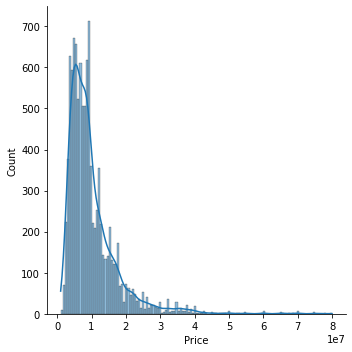

In [258]:
plt.figure(figsize=(20,8))
sns.displot(df['Price'], kde=True)
plt.show()

In [260]:
df.describe()

,Total Area,Price,bedroom,bathroom
count,10520.000000,1.052000e+04,10520.000000,10520.000000
mean,1056.415684,9.995299e+06,1.814354,1.856654
std,3718.397541,7.414929e+06,0.766642,0.726623
min,39.000000,1.000000e+06,1.000000,1.000000
25%,641.750000,5.300000e+06,1.000000,1.000000
50%,862.000000,8.100000e+06,2.000000,2.000000
75%,1165.000000,1.200000e+07,2.000000,2.000000
max,283140.000000,8.000000e+07,7.000000,6.000000


In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X = df.drop(columns=['Price', 'BHK', 'Per sqft'], axis= 1)
y = df['Price']

In [263]:
X.isna().sum()

Total Area    0
bedroom       0
location      0
bathroom      0
dtype: int64

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [266]:
X.head()

,Total Area,bedroom,location,bathroom
0,950,2.0,Roadpali,2.0
1,1850,3.0,Kharghar,3.0
2,715,2.0,Vashi,1.0
3,261,1.0,Panvel,1.0
4,529,2.0,Sanpada,2.0


In [267]:
y.head()

0     5800000.0
1    19000000.0
2    21200000.0
3     4300000.0
4    21300000.0
Name: Price, dtype: float64

In [269]:
print(X_train.shape)
print(X_test.shape)

(8416, 4)
(2104, 4)


In [270]:
# Encoding location column
trf1 = make_column_transformer((OrdinalEncoder(), ['location']), remainder= 'passthrough' )

In [275]:
# Applying Min max scaler
trf2 = MinMaxScaler()

In [272]:
rfr = RandomForestRegressor()

In [276]:
pipe = make_pipeline(trf1, trf2, rfr)

In [277]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['location'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [279]:
y_pred1 = pipe.predict(X_test)

In [280]:
r2_score(y_test, y_pred1)

0.8378293932555647

In [281]:
import pickle

In [282]:
pickle.dump(pipe, open('hp_prediction.pkl', 'wb'))